# Profound Data 

- data imported via: https://github.com/COST-FP1304-PROFOUND
- get structure via: https://cran.r-project.org/web/packages/ProfoundData/vignettes/PROFOUNDdatabase.html

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

for running PRELES the following Data is needed:
- PAR: daily sums of photosynthetically active radiation [mmol/m2]
          - CLIMATE: rad_Jcm2day (total daily global radiation)


- TAir: mean temperature daily [°C]
          - Climate_Local: tmean_degC [daily mean]

- VPD: mean vapour pressure deficits of the day
          - Meteorological: vpdF_hPa [half-hourly]
          
- Precip: precipitation above canopy
          - Meteorological: p_mm [haf hourly]
          - Climate: p_mm [total daily in mm]

- CO2: of air [ppm]
          - CO2_ISIMIP: co2_ppm

- fAPAR: fraction of absorbed photosynthetic radiation; estimatable from LAI {0,1}
          - MODIS: LAI, fpar
          - STAND: LAI
  estimatable via Beer-Lambert law
  
  $f_{aPAR}=1-e^{-kL}$ with $k$ extinction coefficient and $L$ leaf area index $\left[\frac{m^2}{m^2}\right]$
  

- DOY: Day of year

- GPP:
          - MODIS: gpp_gCm2d (1km & 8-day resolution)


In [2]:
#connect to database
con = sqlite3.connect('C:/Users/Niklas/Desktop/Uni/M.Sc. Environmental Science/Thesis/physics_guided_nn/data/ProfoundData.sqlite')

In [3]:
#select data needed
df = pd.read_sql_query('SELECT * FROM FLUX', con)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350095 entries, 0 to 1350094
Data columns (total 31 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   record_id                      1350095 non-null  int64  
 1   site                           1350095 non-null  object 
 2   site_id                        1350095 non-null  int64  
 3   timestampStart                 1350095 non-null  int64  
 4   timestampEnd                   1350095 non-null  int64  
 5   date                           1350095 non-null  object 
 6   year                           1350095 non-null  int64  
 7   day                            1350095 non-null  int64  
 8   mo                             1350095 non-null  int64  
 9   neeCutRef_umolCO2m2s1          1350095 non-null  float64
 10  neeVutRef_umolCO2m2s1          1350095 non-null  float64
 11  neeCutRef_qc                   1350095 non-null  int64  
 12  neeVutRef_qc  

In [24]:
res = con.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in res:
    print(name[0])

VERSION_master
SITESID_master
SITES_master
SITEDESCRIPTION_master
METADATA_SITEDESCRIPTION_master
SOIL_master
METADATA_SOIL_master
METADATA_SOIL_SITES_master
PLOTSIZE_master
METADATA_PLOTSIZE_master
METADATA_PLOTSIZE_SITES_master
TREESPECIES_master
TREE_master
METADATA_TREE_master
METADATA_TREE_SITES_master
METADATA_TREESPECIES_master
STAND_master
METADATA_STAND_master
METADATA_STAND_SITES_master
CLIMATEFLUXNET_master
METADATA_CLIMATEFLUXNET_master
METADATA_CLIMATEFLUXNET_SITES_master
CLIMATE_LOCAL_master
METADATA_CLIMATE_LOCAL_master
METADATA_CLIMATE_LOCAL_SITES_master
CO2_ISIMIP_master
METADATA_CO2_ISIMIP_master
NDEPOSITION_EMEP_master
METADATA_NDEPOSITION_EMEP_master
NDEPOSITION_ISIMIP2B_master
METADATA_NDEPOSITION_ISIMIP2B_master
MODIS_MOD09A1_master
MODIS_MOD11A2_master
MODIS_MOD13Q1_master
MODIS_MOD15A2_master
MODIS_MOD17A2_master
METADATA_MODIS_MOD09A1_master
METADATA_MODIS_MOD11A2_master
METADATA_MODIS_MOD13Q1_master
METADATA_MODIS_MOD15A2_master
METADATA_MODIS_MOD17A2_master
F

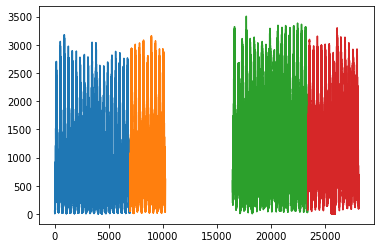

In [59]:
#type(df)
# select climate site hyytiala
#df.info()


plt.plot(df.loc[df['site_id']==12, 'rad_Jcm2day'])
plt.plot(df.loc[df['site_id']==3, 'rad_Jcm2day'])
plt.plot(df.loc[df['site_id']==5, 'rad_Jcm2day'])
plt.plot(df.loc[df['site_id']==14, 'rad_Jcm2day'])


## choose sites
### condition: in same ecosystem, e.g. conifer

- F.5.2 -> species-rich, eutrophic and eu-mesotrophic beech and mixed beech forests
- F.5.1 -> species-poor, oligotrophic to mesotrophic beech and mixed beech

- D.1.3 -> southern boreal coniferous forests: spruce
- F.1 -> species-poor acidophilous, oligo- to mesotraphent oak and mixed oak frests

### same ecosystem:
##### mixed conifers & deciduous
- 3: fagus sylvatica (deciduous), Abies alba (conifer), Picea abies (conifer)
- 5: fagus sylvatica, Abies alba, Geranium nodosum(decid), Trochiscanthes nodiflora (decid)
- 12: Picea abies, dwarf shrubs and herbaceous plants

##### others
- 14: Quercus robur, Pinus pinaster (c)
- 21: Fagus sylvatica, Fraxinus excelsior (decidous only)





In [31]:
#print(df[df.loc[df['site']=='soro']['natVegetation_description']])
df

,site_id,site,lat,lon,epsg,country,aspect_deg,elevation_masl,slope_percent,natVegetation_code1,natVegetation_code2,natVegetation_description
0,3,bily_kriz,49.300000,18.320000,4326.0,Czech Republic,180.0,875.0,12.5,F.5.2.3,F134,Hercynian (spruce-)fir-beech forests (Fagus sy...
1,5,collelongo,41.849336,13.588217,4326.0,Italy,252.0,1560.0,10.0,F.5.2.3,F146,North and middle Apennine beach forests (Fagus...
2,12,hyytiala,61.847420,24.294770,4326.0,Finland,180.0,185.0,2.0,D.1.3,D7,Fennoscandianmoss-rich spruce forests (Picea a...
3,13,kroof,48.250000,11.400000,4326.0,Germany,1.8,502.0,2.1,F.5.1.2,F85,Central European Luzula luzuloides-(sessile oa...
4,14,le_bray,44.717110,-0.769300,4326.0,France,NaN,61.0,0.0,F.1.1,F7,Aquitanian pedunculate oak forests (Quercus ro...
5,16,peitz,51.916600,14.350000,4326.0,Germany,NaN,50.0,0.0,D.5.3.1,D54,SouthScandinavian-east Central European dwarf ...
6,20,solling_beech,51.770000,9.570000,4326.0,Germany,225.0,504.0,1.0,F.5.1.2,F83,(Atlantic-)subatlantic Luzula luzuloides-(sess...
7,21,soro,55.485844,11.644616,4326.0,Denmark,NaN,40.0,0.0,F.5.2.1,F108,South Scandinavian-north Central European Gali...
8,25,solling_spruce,51.764700,9.579700,4326.0,Germany,90.0,508.0,1.0,F.5.1.2,F83,(Atlantic-)subatlantic Luzula luzuloides-(sess...
9,99,global,0.000000,0.000000,NaN,World,NaN,508.0,NaN,none,none,none
